In [1]:
#pytorch workflow

# what_we_covering
### prepare data
### build model
### fitting model to data
### making predictions and evaluating a model
### saving and loading a model
### putting it all together


In [2]:
import torch
from torch import nn ## nn consists all of Pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

In [3]:
#create *known* parameters
weight = 0.7
bais = 0.3

#create 
start=0
end=1
step=0.02
X= torch.arange(start,end,step).unsqueeze(dim=1) #unsqueeze is imp later
y= weight*X +bais
print(X)
print(y)
len(X)+len(y)

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [

100

In [4]:
#splitting data into training and test data
train_split=int(0.8* len(X))
X_train,y_train= X[:train_split], y[:train_split]
X_test,y_test= X[train_split:], y[train_split:]

In [5]:
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

40 10
40 10


In [6]:
def plot_predictions(train_data=X_train,
                    train_lables= y_train,
                    test_data= X_test,
                    test_lables=y_test,
                    predictions=None):
    """
    Plots training data, test data and compares predictions
    """
    
    plt.figure(figsize=(10,7))
    
    #plot the training data in blue
    plt.scatter(train_data,train_lables, c='b', label='training data')
    
    #plot testing data in green
    plt.scatter(test_data,test_lables, c='g', label='test data')
    
    #are there predictions?
    if predictions is not None:
        plt.scatter(test_data,predictions, 'r', label='predictions')

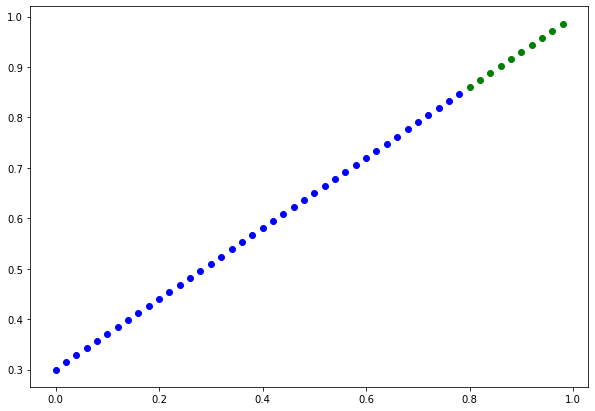

In [7]:
plot_predictions()

In [8]:
#building pytorch model

In [9]:
#creating linear regression model class

In [10]:
class LinearRegressionModel(nn.Module): ##almost everything inherits from nn.module
    def __init__(self):
        super().__init__()
        self.weight= nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype= torch.float))
        self.bais =nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
        
    #forward method to define the computation in the model
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bais #LR formula
    
    

In [11]:
## what our model does:
#### starts with random values (weight and bais)
#### look at training data and adjust the random values to better 
#####   represent(or get closer to) the ideal values (weights and bais)

# it does it using:-
# 1) gradient descent
# 2) backpropogation

In [12]:
## pytorch model building essentials

* torch.nn - contains the building blocks for neural networks
* torch.nn.Parameter- what parameters should our model try and learn, ofter torch.nn will set these for us
* torch.nn.Module- base class for all neaural network modules, if you subclass it, you should overwrite it forward
* torch.optim- this where the optimizers in Pytorch live, they will help with gradient descent


In [13]:
#creating a random seed
torch.manual_seed(42)
#instance of the model
model_0= LinearRegressionModel()
model_0

LinearRegressionModel()

In [14]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
print(model_0.state_dict())

OrderedDict([('weight', tensor([0.3367])), ('bais', tensor([0.1288]))])


##making predictions using torch.inference_mode()
* to check our models predictive power, lets see how well it predicts 'y_test' based on 'X_test'

In [16]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [17]:
with torch.inference_mode():
    y_preds=model_0(X_test)
y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [18]:
(y_preds)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

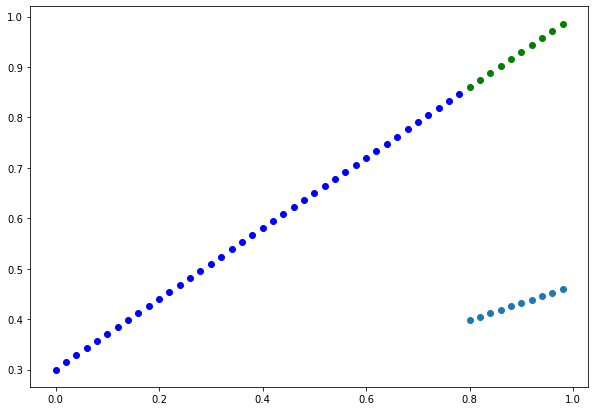

In [19]:
plot_predictions()
plt.scatter(X_test,y_preds)
plt.show()

In [20]:
# train model
# the whole idea of training is for a model to move from some unknown parameters to knows parameters
#or in other words from a poor rep of the data to a better represenation of the data

In [21]:
#one way to measure how poor or how wrong your models predictions are is to use a loss function
#optimezer takes into account the loss of a model and adjusts the models parameters to improve the loss function

In [22]:
((X_test-y_preds)).mean()

tensor(0.4615)

In [23]:
#set up an loss fucntion
loss_fn=nn.L1Loss()



#set up an optimizer
# SGD stochastic gradient descent
optimizer=  torch.optim.SGD(params=model_0.parameters(),
                           lr=0.01) #learning rate


# building a training loop in Pytorch
0. Loop through the data
1. forward pass (this involes data moving through our model's forward() method. to make predictons
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. loss backward
5. optimizer step

In [24]:
model_0.parameters()

<generator object Module.parameters at 0x7fd6202ef040>

In [36]:
#an epoch is one loop through the data
torch.manual_seed(42)
epochs=100
#training
#loop through the data
for epoch in range(epochs):
    #set the model to training mode
    model_0.train() #train mode in pytorch sets all parameters that require gradients
    #forward pass
    y_pred= model_0(X_train)
    #calc the loss
    loss=loss_fn(y_pred, y_train)
#     print(f'loss: {loss}')
    #optimizer zero
    optimizer.zero_grad()
    #perform back propogation
    loss.backward()
    #step the optimizer perform gradient descent
    optimizer.step()
    
    ###testing
    model_0.eval() #turns off different settings not needed
    with torch.inference_mode(): #turns off gradient tracking
        #forward pass
        test_pred=model_0(X_test)
        #calculate the loss
        test_loss=loss_fn(test_pred,y_test)
    if epoch%10==0:
        print(f"Epoch: {epoch} | loss: {loss} | test loss: {test_loss}")
        
        print(model_0.state_dict())

Epoch: 0 | loss: 0.024458957836031914 | test loss: 0.05646304413676262
OrderedDict([('weight', tensor([0.5800])), ('bais', tensor([0.3503]))])
Epoch: 10 | loss: 0.021020207554101944 | test loss: 0.04819049686193466
OrderedDict([('weight', tensor([0.5972])), ('bais', tensor([0.3433]))])
Epoch: 20 | loss: 0.01758546568453312 | test loss: 0.04060482233762741
OrderedDict([('weight', tensor([0.6141])), ('bais', tensor([0.3358]))])
Epoch: 30 | loss: 0.014155393466353416 | test loss: 0.03233227878808975
OrderedDict([('weight', tensor([0.6313])), ('bais', tensor([0.3288]))])
Epoch: 40 | loss: 0.010716589167714119 | test loss: 0.024059748277068138
OrderedDict([('weight', tensor([0.6485])), ('bais', tensor([0.3218]))])
Epoch: 50 | loss: 0.0072835334576666355 | test loss: 0.016474086791276932
OrderedDict([('weight', tensor([0.6654])), ('bais', tensor([0.3143]))])
Epoch: 60 | loss: 0.0038517764769494534 | test loss: 0.008201557211577892
OrderedDict([('weight', tensor([0.6826])), ('bais', tensor([0

In [37]:
weight,bais

(0.7, 0.3)

In [38]:
with torch.inference_mode():
    y_preds_new =model_0(X_test)

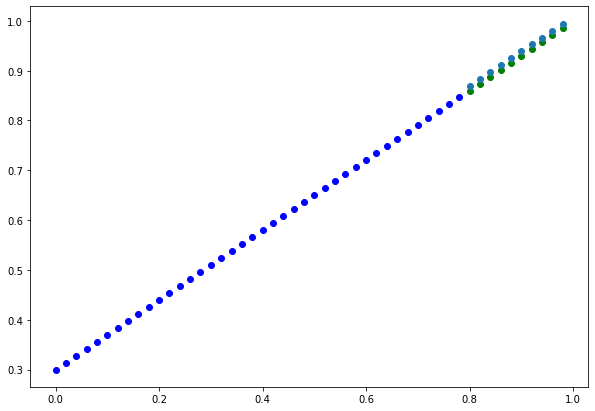

In [52]:
plot_predictions()
plt.scatter(X_test,y_preds_new)
plt.show()

In [40]:
model_0

LinearRegressionModel()

#saving a model in Pytorch
there are 3 methods
1. torch.save()
2. torch.load()
3. torch.nn.Module.load_state_dict()

In [41]:
#saving our pytorch
from pathlib import Path

#create model dir
MODEL_PATH= Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok= True)

#create model save path
MODEL_NAME= '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH=  MODEL_PATH / MODEL_NAME



#save the model for state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
          f=MODEL_SAVE_PATH)
      

Saving model to: models/01_pytorch_workflow_model_0.pth


In [42]:
#loading a pytorch model
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bais', tensor([0.3093]))])

In [43]:
loaded_model_0= LinearRegressionModel()

In [44]:
#load the saved state_dict
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bais', tensor([0.1288]))])

In [45]:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [46]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bais', tensor([0.3093]))])

In [47]:
#make predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds= loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [48]:
#compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [49]:
#making some model preds
model_0.eval()
with torch.inference_mode():
    y_preds=model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [50]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

#putting it all together
